In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

1. Show that $\mathbb{P}(X=x) = F(x^+) - F(x^-)$

$\mathbb{P}(X = x) = \mathbb{P}(X \leq x) - \mathbb{P}(X < x) = F(x) - \mathbb{P}(X < x) = \text{ (by definition) } = F(x^+) - \mathbb{P}(X < x)$

Let's define $A_1 = (-\infty, x - 1]$ and $A_n = (x-\frac{1}{n-1}, x-\frac{1}{n}]$:

$\mathbb{P}(X < x) = \sum_{i=1}^\infty \mathbb{P}(X\in A_i) = \lim_{n\to\infty}\mathbb{P}(X \leq x - \frac{1}{n}) = \lim_{n\to\infty}F(x-\frac{1}{n}) = \lim_{y\uparrow x} F(y) = F(x^-) \Rightarrow \mathbb{P}(X = x) = F(x^+) - F(x^-)$ 

2. Let $X$ be such that $\mathbb{P}(X=2) = \mathbb{P}(X=3)=1/10$ and $\mathbb{P}(X=5)=8/10$. Plot the CDF $F$. Use $F$ to find $\mathbb{P}(2 < X\leq 4.8)$ and $\mathbb{P}(2\leq X\leq 4.8)$.

$\mathbb{P}(2<X\leq 4.8) = F(4.8) - F(2) = 0.2 - 0.1 = 0.1$

$\mathbb{P}(2\leq X\leq 4.8) = F(4.8) - F(2^-) = 0.2 -  0.0 = 0.2$

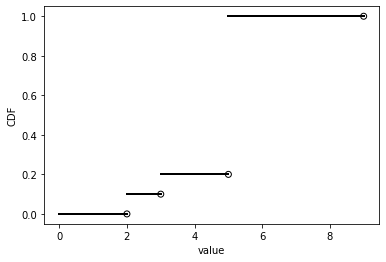

In [26]:
pmf = {value: 0 for value in range(10)}
pmf[2] = 0.1
pmf[3] = 0.1
pmf[5] = 0.8

cdf = pmf.copy()
for idx in range(1, 10):
    cdf[idx] = cdf[idx] + cdf[idx-1]
    
line_segments = []
line_segment = {'value': [0], 'cdf': [cdf[0]]}
for idx in range(1, 10):
    line_segment['value'].append(idx)
    line_segment['cdf'].append(cdf[idx-1])
    if cdf[idx] != cdf[idx-1]:
        line_segments.append(line_segment)
        line_segment = {'value': [idx], 'cdf': [cdf[idx]]}
line_segments.append(line_segment)

for line_segment in line_segments:
    plt.plot(line_segment['value'], line_segment['cdf'], 'k-', lw=2)
    plt.scatter(line_segment['value'][-1], line_segment['cdf'][-1], facecolors='none', edgecolors='k')
    
plt.xlabel('value')
plt.ylabel('CDF')
plt.show()

3. Prove Lemma:

Let $F$ be the CDF for $X$:
- $\mathbb{P}(X = x) = F(x) - F(x^-)$, where $F(x^-) = \lim_{y\uparrow x}F(y)$
- $\mathbb{P}(x < X \leq y) = F(y) - F(x)$
- $\mathbb{P}(X > x) = 1 - F(x)$
- $X$ is continuous $\Rightarrow F(b) - F(a) = \mathbb{P}(a<X<b) = \mathbb{P}(a\leq X < b) = \mathbb{P}(a < X \leq b) = \mathbb{P}(a\leq X \leq b)$

1) $\mathbb{P}(X = x) = \mathbb{P}(\{\omega\in\Omega:X(\omega) = x\}) = \mathbb{P}(\{\omega\in\Omega:X(\omega)\leq x\} - \{\omega\in\Omega:X(\omega) < x\}) = \mathbb{P}(X \leq x) - \mathbb{P}(X < x) = \text{ (by definition) } = F(x) - \mathbb{P}(X < x) = \text{ (from the exercise 1) } = F(x) - F(x^-)$

2) $\mathbb{P}(x < X \leq y) = \mathbb{P}(\{\omega\in\Omega: x < X(\omega) \leq y\}) = 1 - \mathbb{P}(\{\omega\in\Omega: X(\omega) \leq x\} \cup \{\omega\in\Omega: X(\omega) > y\}) = 1 - \mathbb{P}(X\leq x) - \mathbb{P}(X > y) = (1 - \mathbb{P}(X > y)) - \mathbb{P}(X\leq x) = \mathbb{P}(X \leq y) - \mathbb{P}(X\leq x) = F(y) - F(x)$

3) $\mathbb{P}(X > x) = \mathbb{P}(\{\omega\in\Omega: X(\omega) > x\}) = \mathbb{P}(\{\omega\in\Omega: X(\omega) \leq x\}^c) = 1 - \mathbb{P}(\{\omega\in\Omega: X(\omega) \leq x\}) = 1 - F(x)$

4) $\forall \epsilon > 0 \rightarrow \mathbb{P}(X = x) \leq \mathbb{P}(x - \epsilon < X \leq x) \Rightarrow \mathbb{P}(X = x) \leq F(x) - F(x-\epsilon)$

$\lim_{\epsilon\downarrow 0}\mathbb{P}(X = x) \leq \lim_{\epsilon\downarrow 0}(F(x) - F(x-\epsilon)) \Rightarrow \mathbb{P}(X = x) \leq F(x) - F(x) \Rightarrow \mathbb{P}(X = x) \leq 0 \Rightarrow \mathbb{P}(X = x) = 0$

$\mathbb{P}(X = a) = 0$

$\mathbb{P}(X = b) = 0$

$\mathbb{P}(a < X < b) = \mathbb{P}(a < X \leq b) - \mathbb{P}(X = b) = F(b) - F(a) - 0 = F(b) - F(a)$

$\mathbb{P}(a \leq X < b) = \mathbb{P}(a < X \leq b) + \mathbb{P}(X = a) - \mathbb{P}(X = b) = F(b) - F(a) + 0 - 0 = F(b) - F(a)$

$\mathbb{P}(a < X \leq b) = F(b) - F(a)$ by definition

$\mathbb{P}(a \leq X \leq b) = \mathbb{P}(a < X \leq b) + \mathbb{P}(X = a) = F(b) - F(a) + 0 = F(b) - F(a)$

4. Let $X$ have probability density function

$f_X(x) = \begin{cases} 1/4 & 0 < x < 1 \\ 3/8 & 3 < x < 5 \\ 0 & \text{otherwise} \end{cases}$

1) Find the CDF of $X$

$F(x) = \int_{-\infty}^x f_X(x)dx$

$x \leq 0 \rightarrow \int_{-\infty}^x 0 dx = C - C = 0$

$x < 1 \rightarrow \int_{-\infty}^0 0 dx + \int_0^x \frac{1}{4} dx = \frac{x}{4}$

$x < 3 \rightarrow \int_{-\infty}^0 0 dx + \int_0^1 \frac{1}{4} dx \int_1^x 0 + \int_1^x 0 dx = \frac{1}{4}$

$x < 5 \rightarrow \int_{-\infty}^0 0 dx + \int_0^1 \frac{1}{4} dx \int_1^x 0 + \int_1^3 0 dx + \int_3^x \frac{3}{8}dx = \frac{1}{4} + \frac{3(x-3)}{8}$

$x \geq 5 \rightarrow \int_{-\infty}^0 0 dx + \int_0^1 \frac{1}{4} dx \int_1^x 0 + \int_1^3 0 dx + \int_3^5 \frac{3}{8}dx + \int_5^x 0 dx = \frac{1}{4} + \frac{6}{8} = 1$

$F_X(x) = \begin{cases} 0 & x \leq 0 \\ x/4 & 0 < x < 1 \\ 1/4 & 1 < x < 3 \\ 1/4 + 3(x-3)/8 & 3 < x < 5 \\ 1 & x \geq 5 \end{cases}$

2) Let $Y = 1/X$. Find the probability density function $f_Y(y)$ for $Y$. Consider three cases:
- $1/5\leq y \leq 1/3$
- $1/3\leq y \leq 1$
- $y\geq 1$

$F_Y(y) = \mathbb{P}(Y \leq y) = \mathbb{P}(1/X \leq y) = \mathbb{P}(X \geq 1/y) = \mathbb{P}(X > 1/y) = 1 - \mathbb{P}(X \leq 1/y) = 1 - F_X(1/y)$

$1 - F_X(1/y) = \begin{cases} 0 & y < 1/5 \\ 15/8 - 3/8y & 1/5 < y < 1/3 \\ 3/4 & 1/3 < y < 1 \\ 1 - 1/4y & y > 1 \end{cases}$

5. Let $X$ and $Y$ be discrete random variables. Show that $X$ and $Y$ are independent $\iff$ $\forall x,y: f_{XY}(x,y) = f_X(x)f_Y(y)$

1) by definition $X$ and $Y$ are independent when $\mathbb{P}(X\in A, Y\in B) = \mathbb{P}(X\in A)\mathbb{P}(Y\in B)$

In case $A = \{x\}$ nad $B = \{y\}$, then $\forall x,y: \mathbb{P}(X\in \{x\}, Y\in \{y\}) = \mathbb{P}(X\in \{x\})\mathbb{P}(Y\in \{y\}) \Rightarrow \mathbb{P}(X = x, Y = y) = \mathbb{P}(X = x)\mathbb{P}(Y = Y)$

by definition $f_X(x) = \mathbb{P}(X = x) \Rightarrow \mathbb{P}(X = x, Y = y) = f_{XY}(x,y) = \mathbb{P}(X = x)\mathbb{P}(Y = y) = f_X(x)f_Y(y)$

2) $\forall x,y: f_{XY}(x,y) = f_X(x)f_Y(y)$

by definition $f_X(x) = \mathbb{P}(X = x)$

let's consider $A = \{x_1,...,x_n\}$ and $B = \{y_1,...,y_m\}$

$\sum_{i=1}^n f_X(x_i) = \sum_{i=1}^n\mathbb{P}(X = x_i) = \sum_{i=1}^n\mathbb{P}(X\in\{x_i\}) = \mathbb{P}(X\in A)$

$\sum_{j=1}^m f_Y(y_j) = \sum_{j=1}^n\mathbb{P}(Y = y_j) = \sum_{j=1}^n\mathbb{P}(Y\in\{y_j\}) = \mathbb{P}(Y\in B)$

$\mathbb{P}(X\in A)\mathbb{P}(Y\in B) = \sum_{i=1}^n f_X(x_i)\sum_{j=1}^m f_Y(y_j) = \sum_{i=1}^n\sum_{j=1}^m f_X(x_i)f_Y(y_j) = \sum_{i=1}^n\sum_{j=1}^m f_{XY}(x_i,y_i) = \sum_{i=1}^n\sum_{j=1}^m \mathbb{P}(X=x_i, Y=y_i) = \sum_{i=1}^n\sum_{j=1}^m \mathbb{P}(X\in\{x_i\}, Y\in\{y_i\}) = \mathbb{P}(X\in A, Y\in B)$

6. Let $X$ have distribution $F$ and density function $f$ and let $A$ be a subset of the real line. Let $I_A(x)$ be the indicator function for $A$:

$I_A(x) = \begin{cases} 1 & x\in A \\ 0 & x\not\in A \end{cases}$

Let $Y = I_A(X)$. Find an expression for the cumulative distribution of $Y$.

$f_Y(y=1) = \mathbb{P}(Y = 1) = \mathbb{P}(X\in A) = \int_A f_X(x)dx$

$f_Y(y=0) = \mathbb{P}(Y = 0) = \mathbb{P}(X\not\in A) = \mathbb{P}(X\in A^c) = 1 - \mathbb{P}(X\in A) = 1 - \int_A f_X(x)dx$

$f_Y(y) = \begin{cases} 1 - \int_A f_X(x)dx & y = 0 \\ \int_A f_X(x)dx & y = 1 \\ 0 & y\not\in\{0, 1\} \end{cases}$

$F_Y(y) = \begin{cases} 0 & y < 0 \\ 1 - \int_A f_X(x)dx & 0 \leq y < 1 \\ 1 & y \geq 1 \end{cases}$

7. Let $X$ and $Y$ be independent and suppose that each $\sim\text{Uniform}(0,1)$ distribution. Let $Z = \min\{X,Y\}$. Find the density $f_Z(z)$ for $Z$. Hint: it might be easier to first find $\mathbb{P}(Z > z)$

$f_X(x) = \begin{cases} 1 & x\in[0, 1] \\ 0 & x\not\in[0,1] \end{cases}$

$f_Y(y) = \begin{cases} 1 & y\in[0, 1] \\ 0 & y\not\in[0,1] \end{cases}$

$F_X(x) = \begin{cases} 0 & x < 0 \\ x & 0 \leq x < 1 \\ 1 & x\geq 1 \end{cases}$

$F_Y(y) = \begin{cases} 0 & y < 0 \\ y & 0 \leq y < 1 \\ 1 & y\geq 1 \end{cases}$

$F_Z(z) = \mathbb{P}(Z\leq z) = 1 - \mathbb{P}(Z > z) = 1 - \mathbb{P}(\min\{X,Y\} > z) = 1 - \mathbb{P}(X > z, Y > z) = \text{ (because of independence) } = 1 - \mathbb{P}(X > z)\mathbb{P}(Y > z) = 1 - (1 - \mathbb{P}(X \leq z))(1 - \mathbb{P}(Y \leq z)) = 1 - (1 - F_X(z))(1 - F_Y(z))$

$F_Z(z) = \begin{cases} 0 &  z < 0 \\ 2z - z^2 & 0 \leq z < 1 \\ 1 & z \geq 1 \end{cases}$

$f_Z(z) = \begin{cases} 0 & z < 0 \\ 2 - 2z & 0 \leq z < 1 \\ 0 & z \geq 1 \end{cases}$

8. Let $X$ have CDF $F$. Find the CDF of $X^+=\max\{0,X\}$.

$F_{X^+}(x^+) = \mathbb{P}(X^+ \leq x^+) = \mathbb{P}(\max\{0,X\} \leq x^+) = \mathbb{P}(0\leq x^+, X \leq x^+) = \mathbb{P}(X \leq x^+) = F_X(x^+)$ because $x^+\in[0,\infty)$

$F_X^+(x^+) = \begin{cases} F_X(x^+) & x^+\in[0,\infty) \\ 0 & \text{otherwise} \end{cases}$

9. Let $X\sim\text{Exp}(\beta)$. Find $F(x)$ and $F^{-1}(q)$.

1) $f(x) = \frac{1}{\beta}e^{-\frac{x}{\beta}}$, where $x > 0$

$x \leq 0 \rightarrow F(x) = \int_{-\infty}^x 0 dx = 0$

$x > 0 \rightarrow F(x) = \int_0^x \frac{1}{\beta}e^{-\frac{x}{\beta}} dx = \int_0^x e^{-\frac{x}{\beta}} d\frac{x}{\beta} = \int_0^x e^{-u} du = -e^{-u}\Biggr|_0^x = -e^{-\frac{x}{\beta}}\Biggr|_0^x = 1 - e^{-\frac{x}{\beta}}$

$F(x) = \begin{cases} 0 & x \leq 0 \\ 1 - e^{-\frac{x}{\beta}} & x > 0\end{cases}$

2) $F^{-1}(q) = \inf\{x: F(x)>q\}$ for $q\in[0,1]$

$x > 0 \rightarrow F^{-1}(q) = \inf\{x: 1 - e^{-\frac{x}{\beta}}>q\}$ for $q\in[0,1]$

$e^{-\frac{F^{-1}(q)}{\beta}} = 1- q$

${-\frac{F^{-1}(q)}{\beta}} = \ln(1-q)$

$F^{-1}(q) = -\beta\ln(1-q)$

10. Let $X$ and $Y$ be independent. Show that $g(X)$ is independent of $h(Y)$, where $g$ and $h$ are functions.

$\mathbb{P}(g(X)\in A, h(Y)\in B) = \mathbb{P}(X\in g^{-1}(A), Y\in h^{-1}(B)) = \text{ (because of independence definition) } = \mathbb{P}(X\in g^{-1}(A))\mathbb{P}(Y\in h^{-1}(B)) = \mathbb{P}(g(X)\in A)\mathbb{P}(h(Y)\in B)$

11. Suppose we toss a coin once and let $p$ be the probability of heads. Let $X$ denote the number of heads and let $Y$ denote the number of tails.

a) Prove that $X$ and $Y$ are dependent.

Let $1$ is heads and $0$ is tails.

$f_{XY}(1,1) = \mathbb{P}(X = 1, Y = 1) = \mathbb{P}(\{\omega\in\Omega: X(\omega) = 1\} \cap \{\omega\in\Omega: Y(\omega) = 1\} ) = \mathbb{P}(\{H\} \cap \{T\}) = \mathbb{P}(\emptyset) = 0$ 

$f_{XY}(0,0) = \mathbb{P}(X = 0, Y = 0) = \mathbb{P}(\{\omega\in\Omega: X(\omega) = 0\} \cap \{\omega\in\Omega: Y(\omega) = 0\} ) = \mathbb{P}(\{T\} \cap \{H\}) = \mathbb{P}(\emptyset) = 0$ 

$f_{XY}(1,0) = \mathbb{P}(X = 1, Y = 0) = \mathbb{P}(\{\omega\in\Omega: X(\omega) = 1\} \cap \{\omega\in\Omega: Y(\omega) = 0\} ) = \mathbb{P}(\{H\} \cap \{H\}) = \mathbb{P}(\{H\}) = p$

$f_{XY}(0,1) = \mathbb{P}(X = 0, Y = 1) = \mathbb{P}(\{\omega\in\Omega: X(\omega) = 0\} \cap \{\omega\in\Omega: Y(\omega) = 1\} ) = \mathbb{P}(\{T\} \cap \{T\}) = \mathbb{P}(\{T\}) = 1 - p$ 

$X\sim \text{Bernoulli}(p) \Rightarrow f_X(x) = p^x (1-p)^{1-x}$

$Y\sim \text{Bernoulli}(1-p) \Rightarrow f_Y(y) = (1-p)^y p^{1-y}$

From the $f_{XY}(x,y), f_{X}(x), f_{Y}(y)$ it is clear that $f_{XY}(x,y) \neq f_{X}(x)f_{Y}(y)$, so $X$ and $Y$ are not independent.

b) Let $N\sim\text{Poisson}(\lambda)$ and suppose we toss a coin $N$ times. Let $X$ and $Y$ be the number of heads and tails. Show that $X$ and $Y$ are independent.

$f_N(n) = e^{-\lambda}\frac{\lambda^n}{n!}$

$\mathbb{P}(N = n, X = x, Y = y) = \mathbb{P}(N = n | X = x, Y = y) \mathbb{P}(X = x, Y = y) = \mathbb{P}(N = n) \mathbb{P}(X = x, Y = n - x) = e^{-\lambda}\frac{\lambda^n}{n!} \mathbb{P}(\{\omega\in\Omega: X(\omega) = x\} \cap \{\omega\in\Omega: Y(\omega) = n - x\}) = e^{-\lambda}\frac{\lambda^n}{n!} \binom{n}{x}p^x (1-p)^{1-x} = e^{-\lambda}\frac{\lambda^{x+y}}{(x+y)!} \binom{x+y}{x}p^x (1-p)^{1-x} = e^{-\lambda}\frac{\lambda^{x+y}}{(x+y)!} \frac{(x+y)!}{x!y!}p^x (1-p)^{1-x} = e^{-\lambda}\frac{\lambda^{x+y}}{x!y!}p^x (1-p)^{1-x} = e^{-\lambda}\frac{\lambda^x}{x!}p^x (1-p)^{1-x}\cdot \frac{\lambda^y}{y!} = h(x)g(y) \Rightarrow$ $X$ and $Y$ are independent

12. Prove:

**Theorem**

Suppose that the range of $X$ and $Y$ is a (possibly infinite) rectangle. If $f(x,y) = g(x)h(y)$ for some functions $g$ and $h$ (not necessarily PDFs), then $X$ and $Y$ are independent.

$F(x,y) = P(X\leq x, Y \leq y) = \int_{-\infty}^x\int_{-\infty}^y f_{XY}(x,y)dxdy = \int_{-\infty}^x\int_{-\infty}^y g(x)h(y)dxdy = \int_{-\infty}^x g(x)dx \int_{-\infty}^y h(y)dy = G(x)H(y)$

$\lim_{x\to\infty} G(x) = G$ and $\lim_{x\to\infty} H(x) = H$

$\lim_{x\to\infty, y\to\infty} F(x,y) = 1 \Rightarrow G\cdot H = 1$

$f_X(x) = \int_{-\infty}^\infty f_{XY}(x,y)dy = \int_{-\infty}^\infty g(x)h(y)dy = g(x)\int_{-\infty}^\infty h(y) dy = g(x)H$

$f_Y(y) = \int_{-\infty}^\infty f_{XY}(x,y)dx = \int_{-\infty}^\infty g(x)h(y)dx = h(y)\int_{-\infty}^\infty g(x) dx = h(y)G$

$f_X(x)f_Y(y) = g(x)h(y)GH \Rightarrow f_X(x)f_Y(y) = f_{XY}(x,y)GH \Rightarrow f_{XY}(x,y) = f_X(x)f_Y(y) \Rightarrow$ $X$ and $Y$ are independent

13. Let $X\sim N(0,1)$ and let $Y = e^X$

a) Find the PDF $Y$. Plot it.

$f_X(x) = \frac{1}{\sqrt{2\pi}}\exp(-\frac{1}{2}x^2)$, where $x\in\mathbb{R}$

$e^X$ is monotonically increasing function and $X = \ln Y$

$f_X(\ln y) = \frac{1}{\sqrt{2\pi}}\exp(-\frac{1}{2}(\ln y)^2) = \frac{1}{\sqrt{2\pi}} y^{-\frac{1}{2}\ln y}$

$\frac{d(\ln y)}{dy} = \frac{1}{y}$

$f_Y(y) = f_X(s(y))\left|\frac{ds(y)}{dy}\right| = \frac{1}{\sqrt{2\pi}} y^{-\frac{1}{2}\ln y}\cdot\frac{1}{y} = \frac{1}{y^{1+\frac{1}{2}\ln y}\sqrt{2\pi}}$

/var/folders/7n/xq2j9p4155q8j_6jhpctd50m0000gn/T/ipykernel_34474/3384808687.py:2: RuntimeWarning: invalid value encountered in log
  f = 1/((y**(1+(1/2)*np.log(y))) * np.sqrt(2*np.pi))


Text(0, 0.5, 'f(y)')

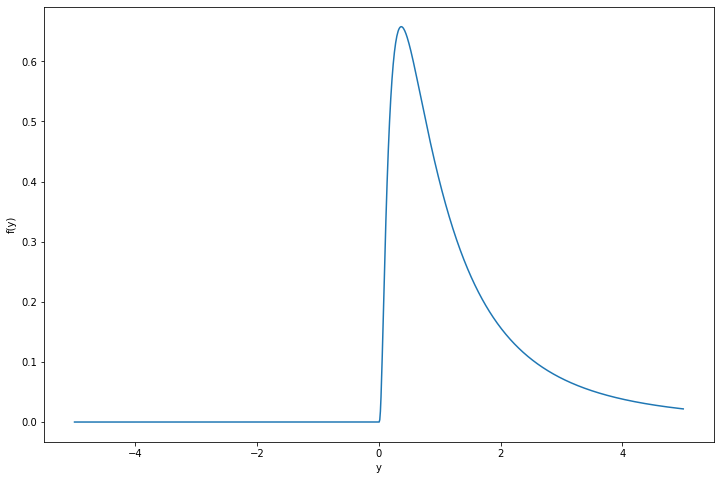

In [36]:
y = np.linspace(start=-5, stop=5, num=1000)
f = 1/((y**(1+(1/2)*np.log(y))) * np.sqrt(2*np.pi))
f[np.isnan(f)] = 0
plt.figure(figsize=(12, 8))
plt.plot(y,f)
plt.xlabel('y')
plt.ylabel('f(y)')

b) Generate a vector $\mathbf{x} = (x1,...,x_{10000})$, consisting of 10000 random standard normals. Let $\mathbf{y} = (y_1,...,y_{10000})$ where $y_i = e^{x_i}$. Draw a histogram of $\mathbf{y}$ and compare it to the PDF you found in part a).

(-5.0, 5.0)

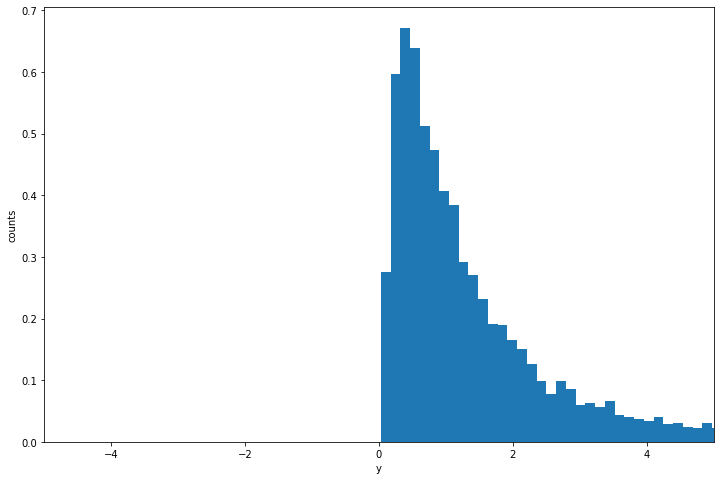

In [35]:
x = np.random.normal(size=10000)
y = np.exp(x)
plt.figure(figsize=(12, 8))
plt.hist(y, density=True, bins=250)
plt.xlabel('y')
plt.ylabel('counts')
plt.xlim((-5,5))

14. Let $(X, Y)$ be uniformly distributed on the unit disk $\{(x, y): x^2 + y^2 \leq 1\}$. Let $R = \sqrt{X^2 + Y^2}$. Find the CDF and PDF or $R$.

$F(x,y) = P(X\leq x, Y\leq Y)$

$F(x,y) = \begin{cases} 0 & x\leq -1, y\leq -1 \\ 1 & x \leq 1, y \leq 1 \end{cases}$

$\int \int_{x^2+y^2\leq1} C dxdy = 1 \Rightarrow C\pi = 1 \Rightarrow C = \frac{1}{\pi}$

$f_{XY}(x,y) = \begin{cases} \frac{1}{\pi} & x^2 + y^2 \leq 1 \\ 0 & \text{otherwise}\end{cases}$

$f_X(x) = \int_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}} \frac{1}{\pi} dy = \frac{2\sqrt{1-x^2}}{\pi} \Rightarrow f_X(x) = \begin{cases} \frac{2\sqrt{1-x^2}}{\pi} & -1 \leq x \leq 1 \\ 0 & \text{otherwise} \end{cases}$

$f_Y(y) = \int_{-\sqrt{1-y^2}}^{\sqrt{1-y^2}} \frac{1}{\pi} dx = \frac{2\sqrt{1-y^2}}{\pi} \Rightarrow f_Y(y) = \begin{cases} \frac{2\sqrt{1-y^2}}{\pi} & -1 \leq y \leq 1 \\ 0 & \text{otherwise} \end{cases}$

$F_R(r) = \mathbb{P}(R \leq r) = \mathbb{P}(\sqrt{X^2 + Y^2}\leq r) = \int\int_{0\leq x^2 + y^2\leq r^2\leq 1} f_{XY}(x,y)dxdy = \frac{1}{\pi}\int\int_{0\leq x^2 + y^2\leq r^2\leq 1}dxdy = r^2$

$F_R(r) = \begin{cases} 0 & r < 0 \\ r^2 & 0 \leq r \leq 1 \\ 1 & r > 1 \end{cases}$

$f_R(r) = F_R'(r)$

$f_R(r) = \begin{cases} 2r & 0 \leq r \leq 1 \\ 0 & \text{otherwise} \end{cases}$

15. (A universal random number generator). Let $X$ have a continuous, strictly increasing CDF $F$. Let $Y = F(X)$. Find the density of $Y$. This is called the probability integral transform. Now let $U\sim\text{Uniform}(0,1)$ and let $X = F^{-1}(U)$. Show that $X\sim F$. Now write a program that takes $\text{Uniform}(0,1)$ random variables and generates random variables from an $\text{Exp}(\beta)$ distribution.

a) **1st approach**

$Y = F_X(X) \Rightarrow y \in [0,1]$

$y\in[0,1]\rightarrow F_Y(y) = \mathbb{P}(Y \leq y) = \mathbb{P}(F_X(X)\leq y) = \mathbb{P}(X\leq F_X^{-1}(y)) = F_X(F_X^{-1}(y)) = y \Rightarrow F_Y(y) = y$

$y\in[0,1]\rightarrow f_Y(y) = 1$

**2nd approach**

$f_X(F_X^{-1}(y))\left|\frac{dF_X^{-1}(y)}{dy}\right|$

$y\in[0,1]\rightarrow F_Y(y) = \int_0^y f_X(F_X^{-1}(y))\left|\frac{dF_X^{-1}(y)}{dy}\right| dy = \int_0^y f_X(F_X^{-1}(y)) dF_X^{-1}(y) = F_X(F_X^{-1}(y))\Biggr|_0^y = y$

$y\in[0,1]\rightarrow f_Y(y) = 1$

b) $X\sim F_X$ and $Y\sim F_Y = \text{Uniform(0, 1)}$ and let $q\in[0,1]$

$F_X(q) = \mathbb{P}(X\leq q) = \mathbb{P}(F^{-1}(Y)\leq q) = \mathbb{P}(Y \leq F(q)) = F_Y(F(q))$

$F_Y(y) = \begin{cases} 0 & y < 0 \\ y & y\in[0,1] \\ 1 & y > 1\end{cases}$

$F_Y(F(q)) = \begin{cases} 0 & F(q) < 0 \\ F(q) & F(q)\in[0,1] \\ 1 & F(q) > 1\end{cases} \Rightarrow F_Y(F(q)) = F(q) \Rightarrow F_X(q) = F(q) \Rightarrow X\sim F$

c) $F^{-1}(q) = -\beta\ln(1-q)$

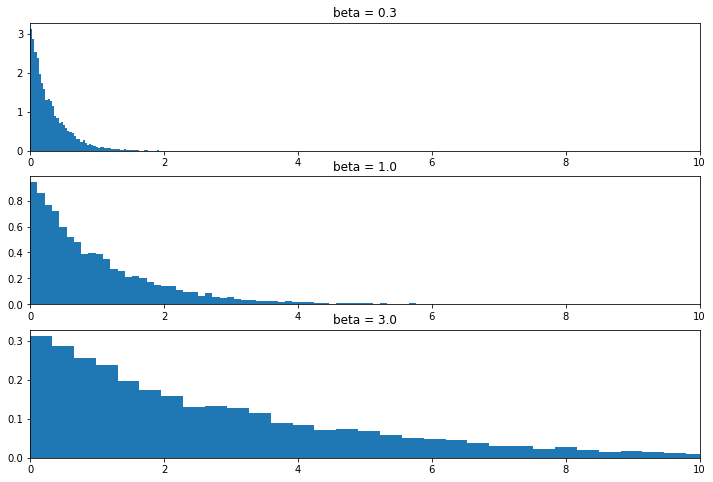

In [13]:
uniform_variables = np.random.uniform(size=10000)
betas = [0.3, 1.0, 3.0]

exponential_variables = {
    betas[0]: -betas[0] * np.log(1 - uniform_variables),
    betas[1]: -betas[1] * np.log(1 - uniform_variables),
    betas[2]: -betas[2] * np.log(1 - uniform_variables)
}

plt.figure(figsize=(12, 8))
for i in range(len(betas)):
    axis = plt.subplot(3, 1, (i + 1))
    axis.hist(exponential_variables[betas[i]], density=True, bins=100)
    axis.set_title(f'beta = {betas[i]}')
    axis.set_xlim((0, 10))
                 
plt.show()

16. Let $X\sim\text{Poisson}(\lambda)$ and $Y\sim\text{Poisson}(\mu)$ and assume that $X$ and $Y$ are independent. Show that the distribution of $X|X+Y=n\sim\text{Binomial}(n,\pi)$, where $\pi=\lambda/(\lambda + \mu)$.

$\mathbb{P}(X=x|X+Y=n) = \frac{\mathbb{P}(X=x,X+Y=n)}{\mathbb{P}(X+Y=n)} = \frac{\mathbb{P}(X+Y=n|X=x)\mathbb{P}(X=x)}{\mathbb{P}(X+Y=n)} = \frac{\mathbb{P}(x+Y=n|X=x)\mathbb{P}(X=x)}{\mathbb{P}(X+Y=n)} = \frac{\mathbb{P}(Y=n-x|X=x)\mathbb{P}(X=x)}{\mathbb{P}(X+Y=n)} = \frac{\mathbb{P}(Y=n-x)\mathbb{P}(X=x)}{\mathbb{P}(X+Y=n)}$

$X+Y\sim\text{Poisson}(\lambda+\mu)$

$\frac{\mathbb{P}(Y=n-x)\mathbb{P}(X=x)}{\mathbb{P}(X+Y=n)} = e^{-\lambda-\mu}\frac{\lambda^x \mu^{n-x}}{x!(n-x)!} / e^{-\lambda-\mu}\frac{(\lambda+\mu)^n}{n!} = \frac{n!}{x!(n-x)!}\frac{\lambda^x \mu^{n-x}}{(\lambda+\mu)^n} =  \frac{n!}{x!(n-x)!}\frac{\lambda^x \mu^{n-x}}{(\lambda+\mu)^x(\lambda+\mu)^{n-x}} = \frac{n!}{x!(n-x)!}\left(\frac{\lambda}{\lambda+\mu}\right)^x\left(\frac{\mu}{\lambda+\mu}\right)^{n-x} = \frac{n!}{x!(n-x)!}\left(\frac{\lambda}{\lambda+\mu}\right)^x\left(1-\frac{\lambda}{\lambda+\mu}\right)^{n-x}$

$\mathbb{P}(X=x|X+Y=n)=\frac{n!}{x!(n-x)!}\left(\frac{\lambda}{\lambda+\mu}\right)^x\left(1-\frac{\lambda}{\lambda+\mu}\right)^{n-x}=\frac{n!}{x!(n-x)!}\pi^x(1-\pi)^{n-x}\Rightarrow X|X+Y=n\sim\text{Binomial}(n,\pi)$

17. Let $f_{XY}(x,y)=\begin{cases} c(x+y^2) & 0\leq x\leq 1 \text{ and } 0\leq y\leq 1 \\ 0 & \text{otherwise}\end{cases}$. Find $\mathbb{P}(X<1/2|Y=1/2)$

$\int_0^1\int_0^1c(x+y^2)dxdy = 1$

$c\int_0^1\int_0^1xdxdy + c\int_0^1\int_0^1y^2dxdy = 1$

$\frac{c}{2} + \frac{c}{3} = 1 \Rightarrow c = \frac{6}{5}$

$f(x|y) = \frac{f(x,y)}{f(y)} = \frac{c(x+y^2)}{\int_0^1 c(x+y^2)dx} = \frac{x+y^2}{1/2 + y^2}$

$\mathbb{P}(X<1/2|Y=1/2) = \int_{-\infty}^{1/2}f_{X|Y}(x|y=1/2)dx = \int_0^{1/2}\frac{x+1/4}{1/2 + 1/4}dx = \int_0^{1/2}\frac{x+1/4}{3/4}dx = \int_0^{1/2}\frac{4x+1}{3}dx = \left(\frac{4x^2}{6} + \frac{x}{3}\right)\Biggr|_0^{1/2} = \frac{1}{6} + \frac{1}{6} = \frac{1}{3}$

18. Let $X\sim N(3,16)$. Solve the following using the Normal table and using a computer package.

a) $\mathbb{P}(X<7) = \Phi(\frac{7-3}{4}) = \Phi(1) = 0.8413$

b) $\mathbb{P}(X > -2) = 1 - \mathbb{P}(X < -2) = 1 - \Phi(\frac{-2-3}{4}) = 1 - \Phi(-1.25) = 1 - 0.1056 = 0.8944$

c) $\mathbb{P}(X > x) = 0.05 \Rightarrow 1 - \mathbb{P}(X < x) = 0.05 \Rightarrow \mathbb{P}(X < x) = 0.95 \Rightarrow \Phi(\frac{x-3}{4}) = 0.95 \Rightarrow 1.65 = \frac{x-3}{4} \Rightarrow x = 9.6$

d) $\mathbb{P}(0\leq X\leq 4) = \Phi(\frac{4-3}{4}) - \Phi(\frac{0-3}{4}) = \Phi(0.25) - \Phi(-0.75) = 0.5987 - 0.2266 = 0.3721$

e) $\mathbb{P}(|X| > |x|) = 0.05$

$\mathbb{P}(|X| > |x|) = 1 - \mathbb{P}(|X| < |x|) = 1 - \mathbb{P}(-|x| < X < |x|) = 1 - (\mathbb{P}(X < |x|) - \mathbb{P}(X < -|x|)) = 1 - (\mathbb{P}(X < |x|) - (1 - \mathbb{P}(X > -|x|))) = 2 - 2\mathbb{P}(X < |x|) = 2 - 2\Phi(\frac{|x|-3}{4}) = 0.05$

$2\Phi(\frac{|x|-3}{4}) = 1.95 \Rightarrow \Phi(\frac{|x|-3}{4}) = 0.975 \Rightarrow \frac{|x| - 3}{4} = 1.96 \Rightarrow |x| = 10.84 \Rightarrow x_1 = -10.84 \text{ and } x_2 = 10.84$


In [12]:
from scipy.stats import norm

print(
    f'P(X < 7) = {norm.cdf(1)}\n'
    f'P(X > -2) = {1-norm.cdf(-1.25)}\n'
    f'P(X > x) = 0.05 => x = {4*norm.ppf(0.95)+3}\n'
    f'P(0 < X < 4) = {norm.cdf(0.25) - norm.cdf(-0.75)}\n'
    f'P(|X| > |x|) = 0.05 => x1 = {4*norm.ppf(0.975)+3} and x2 = {-(4*norm.ppf(0.975) + 3)}'
)

P(X < 7) = 0.8413447460685429
P(X > -2) = 0.8943502263331446
P(X > x) = 0.05 => x = 9.57941450780589
P(0 < X < 4) = 0.3720789733060555
P(|X| > |x|) = 0.05 => x1 = 10.839855938160216 and x2 = -10.839855938160216


19. Prove $f_Y(y) = f_X(s(y))\left|\frac{ds(y)}{dy}\right|$, where $s(y) = r^{-1}(y)$ and $r(x_1) < r(x_2)$ or $r(x_1) > r(x_2)$.

- $r(x_1) < r(x_2) \Rightarrow s(y_1) < s(y_2) \Rightarrow \frac{s(y)}{dy} > 0$

$F_Y(y) = \mathbb{P}(Y < y) = \mathbb{P}(r(X) < y) = \mathbb{P}(X < s(y)) = F_X(s(y))$

$\frac{F_Y(y)}{dy} = f_Y(y) = \frac{F_X(s(y))}{dy} = f_X(s(y))\frac{ds(y)}{dy}$

- $r(x_1) > r(x_2) \Rightarrow s(y_1) > s(y_2) \Rightarrow \frac{s(y)}{dy} < 0$

$F_Y(y) = \mathbb{P}(Y < y) = \mathbb{P}(r(X) < y) = \mathbb{P}(X > s(y)) = 1 - \mathbb{P}(X < s(y)) = 1 - F_X(s(y))$

$\frac{F_Y(y)}{dy} = f_Y(y) = -\frac{F_X(s(y))}{dy} = -f_X(s(y))\frac{ds(y)}{dy}$

$\begin{cases} r(x_1) < r(x_2) \Rightarrow f_Y(y) = f_X(s(y))\frac{ds(y)}{dy} \\ r(x_1) > r(x_2) \Rightarrow f_Y(y) = -f_X(s(y))\frac{ds(y)}{dy}\end{cases} \Rightarrow f_Y(y) = f_X(s(y))\left|\frac{ds(y)}{dy}\right|$

20. Let $X, Y\sim\text{Unifrom}(0,1)$ be independent. Find the PDF for $X - Y$ and $X/Y$.

$f_X(x) = \begin{cases} 1 & 0\leq x\leq 1 \\ 0 & \text{otherwise} \end{cases}$

$f_Y(y) = \begin{cases} 1 & 0\leq y\leq 1 \\ 0 & \text{otherwise} \end{cases}$

$f_{XY}(x,y) = \begin{cases} 1 & 0\leq x\leq 1, 0\leq y\leq 1 \\ 0 & \text{otherwise} \end{cases}$

a) $Z = X - Y$

$F_Z(z) = \mathbb{P}(Z < z) = \mathbb{P}(X - Y < z) = \mathbb{P}(\{(x,y): x - y < z\}) = \int\int_{A_z}dxdy$

$-1\leq z \leq 0 \rightarrow$ Triangle with vertices $(0,1), (1+z,1), (0,-z) \Rightarrow F_Z(z) = \frac{(1+z)^2}{2}$

$0\leq z\leq 1\rightarrow$ Square minus triange with vertices $(1, 1), (z, 0), (1, 1-z) \Rightarrow F_Z(z) = 1 - \frac{(1-z)^2}{2}$

$F_Z(z) = \begin{cases} 0 & z < 0 \\ \frac{(1+z)^2}{2} & -1\leq z\leq 0 \\ 1 - \frac{(1-z)^2}{2} & 0\leq z \leq 1 \\ 1 & z > 1\end{cases}$

$f_Z(z) = \begin{cases} 1+z & -1\leq z\leq 0 \\ 1-z & 0\leq z\leq 1 \\ 0 & \text{otherwise}\end{cases}$

b) $Z = X/Y$

$F_Z(z) = \mathbb{P}(Z < z) = \mathbb{P}(X/Y < z) = \mathbb{P}(\{(x,y): x/y < z\}) = \int\int_{A_z}dxdy$

$0\leq z\leq 1 \rightarrow$ Triangle with vertices $(0,0), (0,1), (z,1) \Rightarrow F_Z(z) = \frac{z}{2}$

$z > 1 \rightarrow$ Square minus triangle with vertices $(0,0), (1,1), (1, \frac{1}{z}) \Rightarrow F_Z(z) = 1 - \frac{1}{2z}$

$F_Z(z) = \begin{cases} 0 & z < 0 \\ \frac{z}{2} & 0\leq z\leq 1 \\ 1 - \frac{1}{2z} & z > 1\end{cases}$

$f_Z(z) = \begin{cases} \frac{1}{2} & 0\leq z \leq 1 \\ \frac{1}{2z^2} & z > 1 \\ 0 & \text{otherwise}\end{cases}$

Let $X_1,...,X_n\sim\text{Exp}(\beta)$ be IID. Let $Y=\max{\{X_1,...,X_n\}}$. Find the PDF for $Y$.

$F_Y(y) = \mathbb{P}(Y \leq y) = \mathbb{P}(\max{\{X1,...,X_n\}} \leq y) = \mathbb{P}(\{\omega\in\Omega: X_1(\omega)\leq y\} \cap ... \cap \{\omega\in\Omega: X_n(\omega)\leq y\}) = \text{ (because of independence) } = \mathbb{P}(\{\omega\in\Omega: X_1(\omega)\leq y\})...\mathbb{P}(\{\omega\in\Omega: X_n(\omega)\leq y\}) = F_{X_1}(y)...F_{X_n}(y)$

$y \leq 0 \rightarrow F_Y(y) = 0$

$y > 0 \rightarrow F_Y(y) = \left(1 - e^{-\frac{y}{\beta}}\right)...\left(1 - e^{-\frac{y}{\beta}}\right) = \left(1 - e^{-\frac{y}{\beta}}\right)^n$

$F_Y(y) = \begin{cases} \left(1-e^{-\frac{y}{\beta}}\right)^n & y > 0 \\ 0 & \text{otherwise} \end{cases}$

$f_Y(y) = \begin{cases} \frac{n}{\beta}\left(1-e^{-\frac{y}{\beta}}\right)^{n-1} e^{-\frac{y}{\beta}} & y > 0 \\ 0 & \text{otherwise} \end{cases}$